# Lab. Filters and Edges

At the end of this laboratory, you would get familiarized with

*   Convolution
*   Image Filters
*   Edge detection
---

In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import color, data, exposure, feature, filters, io, morphology, util

# Convolution
Hint: 
*   *convolve function is available in scipy.ndimage module*
*   The mask has to be normalized before convolving with the image

### Exercise:
*   Read 'camera' image from the data module
*   Convolve the image with a horizontal mask:  (1 x 15) with all values set to ones


In [2]:
import numpy as np
from scipy.ndimage import convolve
from matplotlib import pyplot as plt
from skimage import data

image = data.camera()


In [3]:
# solution

horizontal_mask = np.ones((1, 15)) / 15
horizontal_convolved = convolve(image, horizontal_mask)


*   Convolve the image with a vertical mask:  (15 x 1) with all values set to ones

In [4]:
# solution
vertical_mask = np.ones((15, 1)) / 15
vertical_convolved = convolve(image, vertical_mask)



*   Convolve the image with a 2D mask:  (15 x 15) with all values set to ones

In [5]:
# solution
mask_2d = np.ones((15, 15)) / 225
convolved_2d = convolve(image, mask_2d)


*   Visualize the original image, horizontal convolution, vertical convolution, 2D convolution using matplotlib subplot.

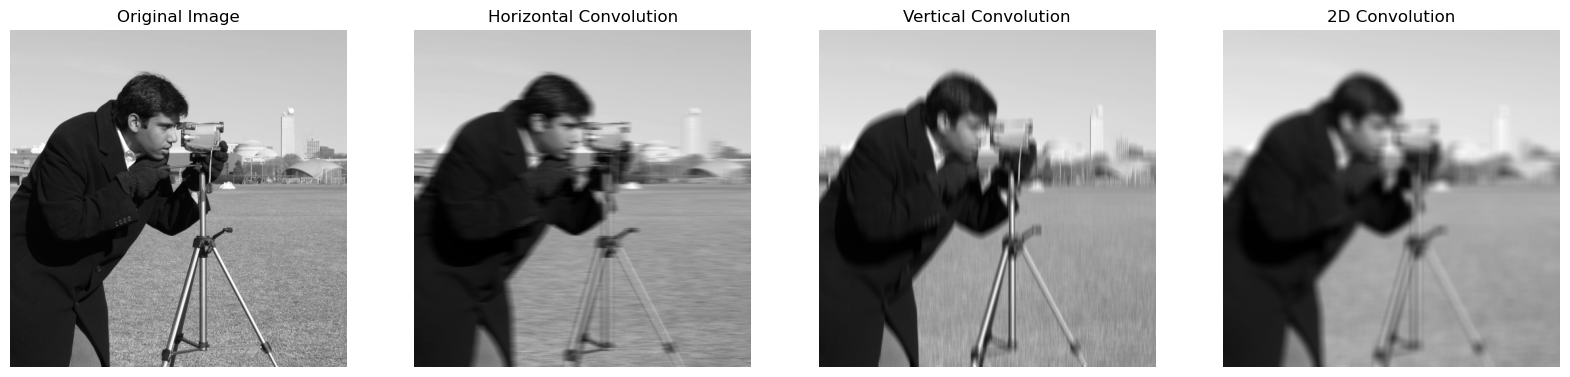

In [6]:
# solution
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(horizontal_convolved, cmap='gray')
axes[1].set_title('Horizontal Convolution')

axes[2].imshow(vertical_convolved, cmap='gray')
axes[2].set_title('Vertical Convolution')

axes[3].imshow(convolved_2d, cmap='gray')
axes[3].set_title('2D Convolution')

for ax in axes:
    ax.axis('off')
plt.show()


*   Apply 2 stage convolution: Horizontal mask (1 x 15) with all values set to 1 followed by vertical mask (15 x 1) with all values set to 1
*   Visualize the original image, 2D convolved image, 2 stage convolved image using matplotlib subplot.


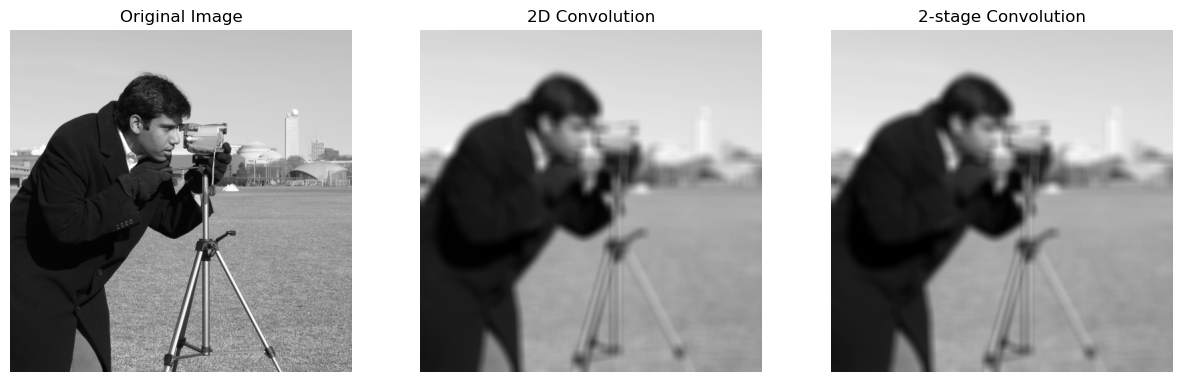

In [7]:
# solution
stage1 = convolve(image, horizontal_mask)
stage2 = convolve(stage1, vertical_mask)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(convolved_2d, cmap='gray')
axes[1].set_title('2D Convolution')

axes[2].imshow(stage2, cmap='gray')
axes[2].set_title('2-stage Convolution')

for ax in axes:
    ax.axis('off')
plt.show()


*   Is the result different from applying convolution with 2D mask (15 x 15) with all values set to 1?

**Solution**

*(Double-click or enter to edit)*

Yes, the result of applying a 2-stage convolution (first a horizontal mask, then a vertical mask) is different from applying a single 2D mask (15x15) with all values set to 1.
2D Convolution: This will result in a uniform blurring effect that averages the pixel values in both horizontal and vertical directions simultaneously.
2-Stage Convolution: This will first blur the image in the horizontal direction, spreading the pixel values horizontally, and then blur the result in the vertical direction, spreading the pixel values vertically.

# Image Blurring

*   Why is blurring important?



**Solution**

*(Double-click or enter to edit)*

...Blurring is important for reducing noise and details in an image, which can be useful for various applications such as reducing noise in medical images, improving edge detection, and artistic effects.

### Exercise: Gaussian Filter
*   Read 'astronaut' image from the data module
*   Convert the image to grayscale.
*   Apply a gaussian filter with sigma=1
*   Hint: *gaussian function is available in skimage.filters module*

In [10]:
# solution
astronaut_image = data.astronaut()
gray_astronaut = color.rgb2gray(astronaut_image)
sigma1 = filters.gaussian(gray_astronaut, sigma=1)




*   Apply a gaussian filter with sigma=0. What is the result of this operation?

In [11]:
# solution
sigma0 = filters.gaussian(gray_astronaut, sigma=0)



*   Vary the value of sigma in the gaussian filter. Apply sigma=0.25, 0.5, 1, 1.5, 2, 5
*   Visualize the different results using matplotlib subplot.

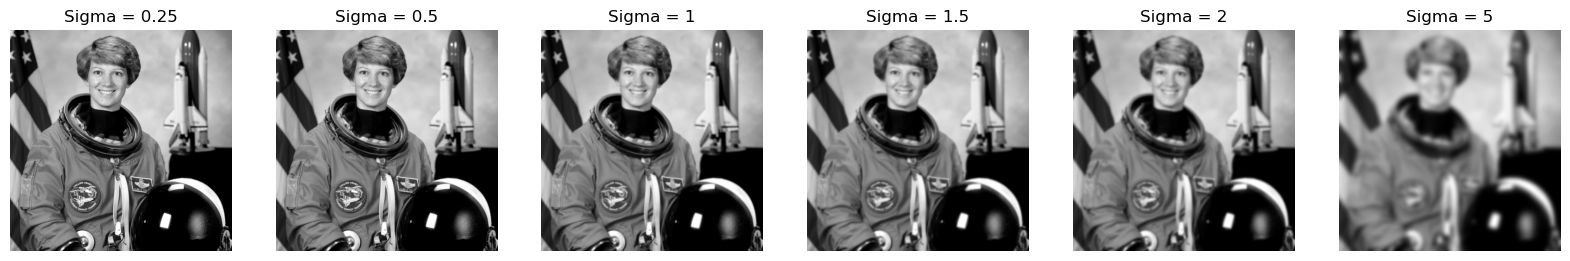

In [12]:
# solution
sigmas = [0.25, 0.5, 1, 1.5, 2, 5]
fig, axes = plt.subplots(1, 6, figsize=(20, 5))

for ax, sigma in zip(axes, sigmas):
    filtered_image = filters.gaussian(gray_astronaut, sigma=sigma)
    ax.imshow(filtered_image, cmap='gray')
    ax.set_title(f'Sigma = {sigma}')
    ax.axis('off')

plt.show()



*    What happens when a larger sigma value is used and what happens when a smaller sigma value is used in the gaussian filter?
*    What determines the optimal sigma value?




**Solution**

*(Double-click or enter to edit)*

...
Smaller sigma values retain more details and less blurring.
Larger sigma values produce more blurring, reducing details.

### Exercise: Median Filter
*   Convert the 'astronauts' image to grayscale
*   Apply median filter with a disk structuring element of radius 1, 5, 10
*   Visualize the original image and the filtered image matplotlib subplot.

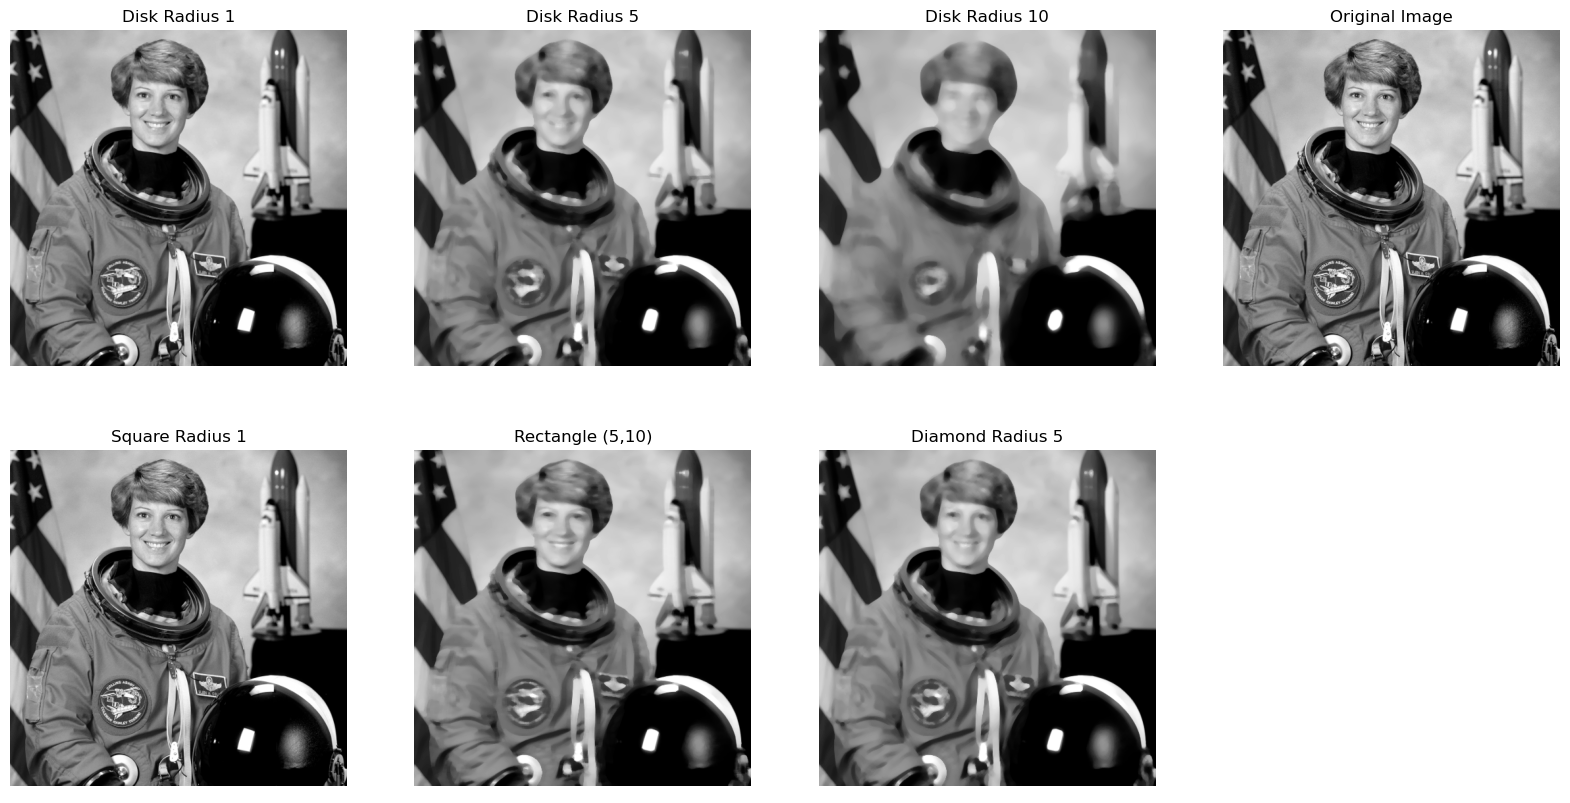

In [13]:
# solution
from skimage.morphology import disk, square, rectangle, diamond

gray_astronaut = color.rgb2gray(data.astronaut())

disk1 = filters.median(gray_astronaut, disk(1))
disk5 = filters.median(gray_astronaut, disk(5))
disk10 = filters.median(gray_astronaut, disk(10))

square1 = filters.median(gray_astronaut, square(1))
rectangle1 = filters.median(gray_astronaut, rectangle(5, 10))
diamond1 = filters.median(gray_astronaut, diamond(5))

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

axes[0, 0].imshow(disk1, cmap='gray')
axes[0, 0].set_title('Disk Radius 1')

axes[0, 1].imshow(disk5, cmap='gray')
axes[0, 1].set_title('Disk Radius 5')

axes[0, 2].imshow(disk10, cmap='gray')
axes[0, 2].set_title('Disk Radius 10')

axes[0, 3].imshow(gray_astronaut, cmap='gray')
axes[0, 3].set_title('Original Image')

axes[1, 0].imshow(square1, cmap='gray')
axes[1, 0].set_title('Square Radius 1')

axes[1, 1].imshow(rectangle1, cmap='gray')
axes[1, 1].set_title('Rectangle (5,10)')

axes[1, 2].imshow(diamond1, cmap='gray')
axes[1, 2].set_title('Diamond Radius 5')

for ax in axes.flatten():
    ax.axis('off')

plt.show()



*   What is the effect of the structuring element on the median filter?


**Solution**

*(Double-click or enter to edit)*

...
The structuring element in a median filter plays a crucial role in determining the shape and size of the neighborhood over which the median is computed. The choice of structuring element affects how the median filter processes the image and influences the results. Different structuring elements can lead to varying effects on the image, particularly in terms of noise reduction, edge preservation, and overall image smoothing.

*   What is the difference between gaussian filter, mean filter and median filter?
*   Provide an example where each one would be used.


**Solution**

*(Double-click or enter to edit)*

...The Gaussian filter is a linear filter that uses a Gaussian function (bell curve) to calculate the weight of each pixel's neighborhood.
The mean filter, also known as the average filter, is a linear filter that replaces each pixel with the average value of its neighborhood.

### Exercise: Effect of noise

It is easy to add noise to an image using the random_noise function available in skimage.util

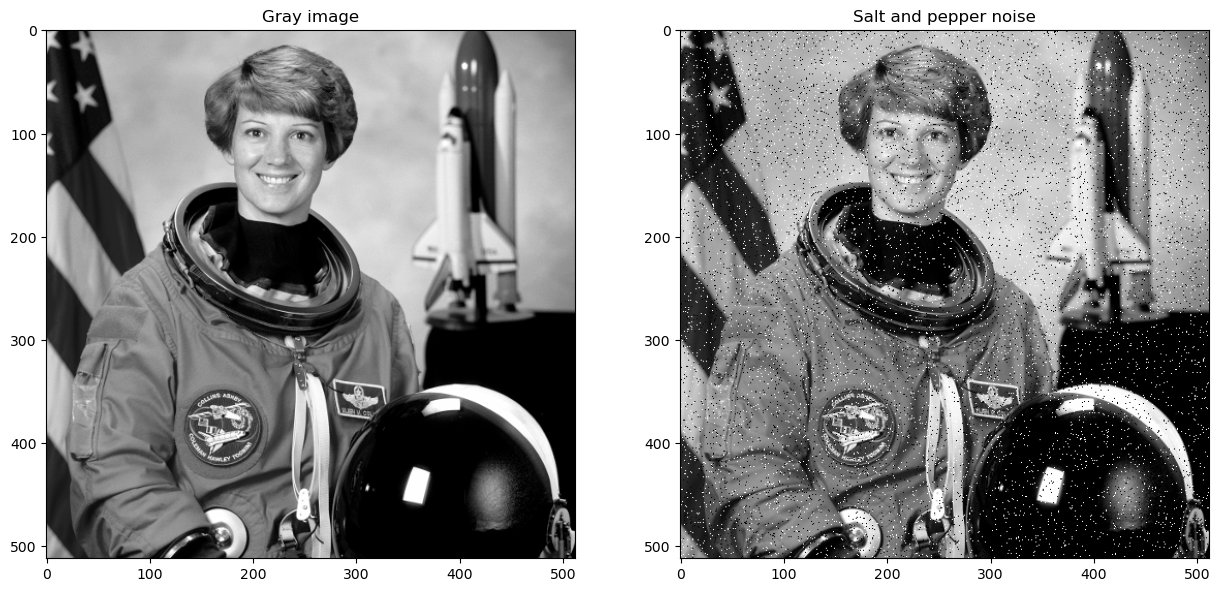

In [14]:
from skimage.util import random_noise
image = data.astronaut()
image = color.rgb2gray(image)

img_noise = random_noise(image, mode='s&p')  # salt and pepper noise is added

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 7))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Gray image')
ax[1].imshow(img_noise, cmap='gray')
ax[1].set_title('Salt and pepper noise')

plt.show()

*   Create noisy images with **gaussian** noise and **salt and pepper** noise.
*   Apply mean filter, median filter and gaussian filter in each of the noisy images.
*   Visualize the images and observe the difference in each filter with respect to the noise.

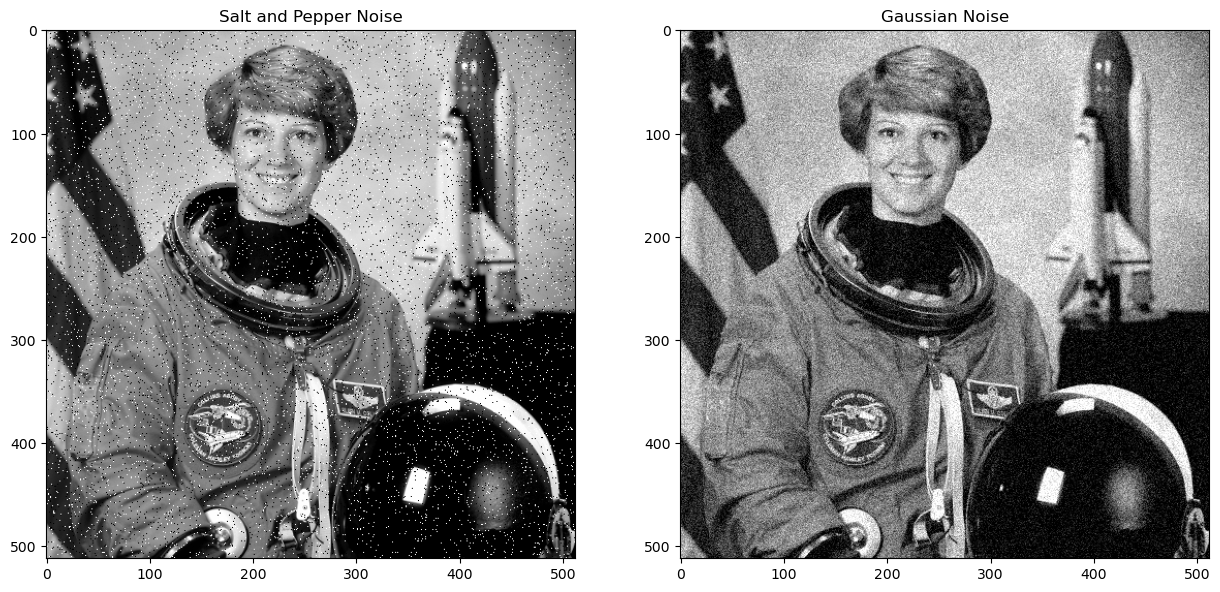

In [15]:
# solution
img_noise_sp = random_noise(gray_astronaut, mode='s&p')
img_noise_gauss = random_noise(gray_astronaut, mode='gaussian')

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

axes[0].imshow(img_noise_sp, cmap='gray')
axes[0].set_title('Salt and Pepper Noise')

axes[1].imshow(img_noise_gauss, cmap='gray')
axes[1].set_title('Gaussian Noise')

plt.show()



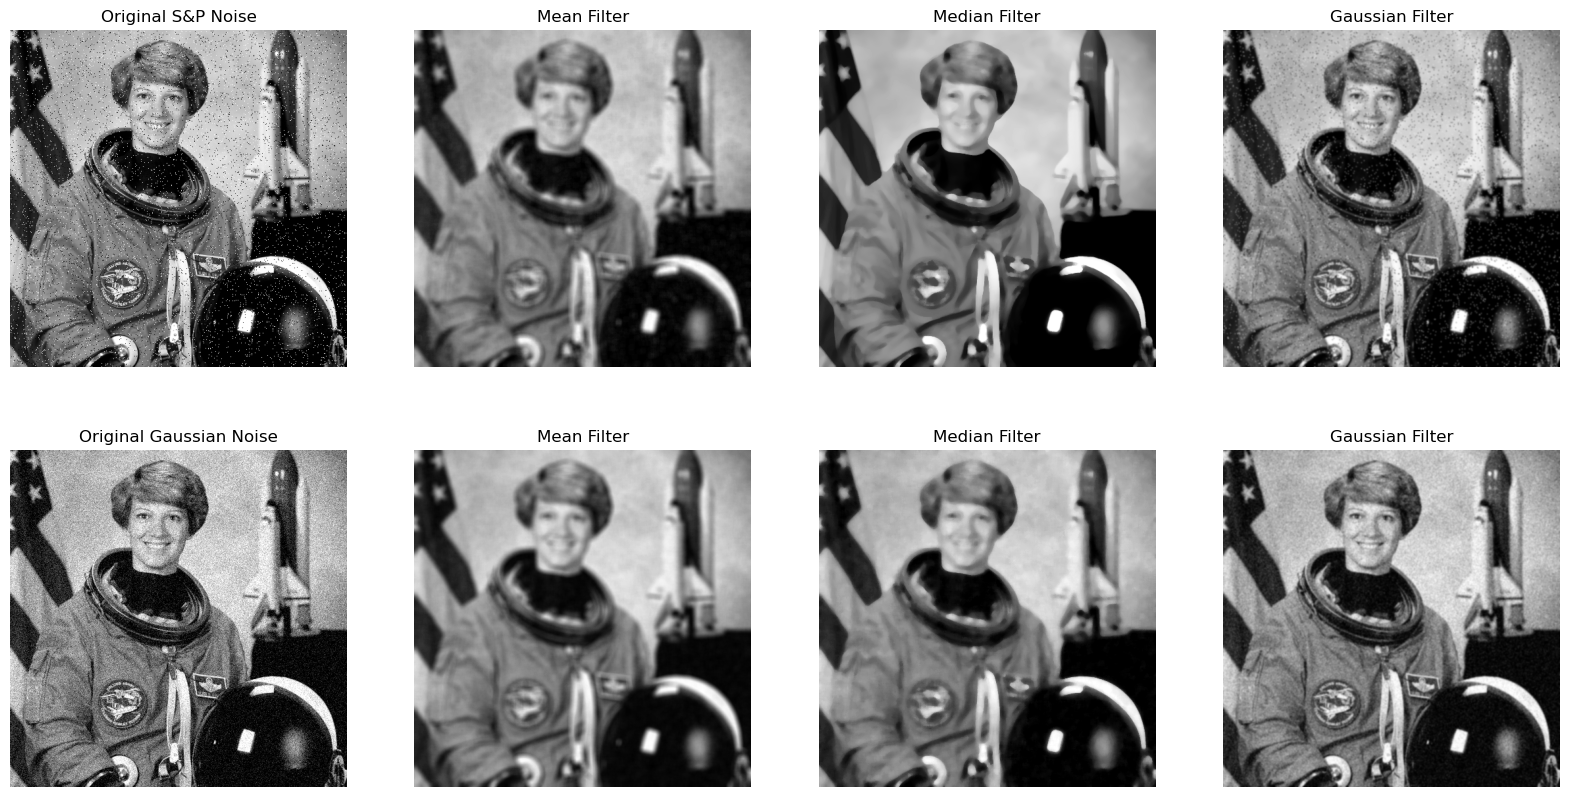

In [16]:
mean_sp = filters.rank.mean(util.img_as_ubyte(img_noise_sp), disk(5))
median_sp = filters.median(img_noise_sp, disk(5))
gaussian_sp = filters.gaussian(img_noise_sp, sigma=1)

mean_gauss = filters.rank.mean(util.img_as_ubyte(img_noise_gauss), disk(5))
median_gauss = filters.median(img_noise_gauss, disk(5))
gaussian_gauss = filters.gaussian(img_noise_gauss, sigma=1)

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

axes[0, 0].imshow(img_noise_sp, cmap='gray')
axes[0, 0].set_title('Original S&P Noise')

axes[0, 1].imshow(mean_sp, cmap='gray')
axes[0, 1].set_title('Mean Filter')

axes[0, 2].imshow(median_sp, cmap='gray')
axes[0, 2].set_title('Median Filter')

axes[0, 3].imshow(gaussian_sp, cmap='gray')
axes[0, 3].set_title('Gaussian Filter')

axes[1, 0].imshow(img_noise_gauss, cmap='gray')
axes[1, 0].set_title('Original Gaussian Noise')

axes[1, 1].imshow(mean_gauss, cmap='gray')
axes[1, 1].set_title('Mean Filter')

axes[1, 2].imshow(median_gauss, cmap='gray')
axes[1, 2].set_title('Median Filter')

axes[1, 3].imshow(gaussian_gauss, cmap='gray')
axes[1, 3].set_title('Gaussian Filter')

for ax in axes.flatten():
    ax.axis('off')

plt.show()


*   Which filter works better for gaussian noise and which filter works better for salt and pepper noise? Explain your choice of the filter for that particular type of noise.


**Solution**

*(Double-click or enter to edit)*

...Mean filter: Works better for Gaussian noise but may blur edges.
Median filter: Excellent for salt and pepper noise, preserves edges.
Gaussian filter: Smooths images and reduces Gaussian noise effectively.

# Image Sharpening

A sharpening filter can be broken down into two steps: It takes a smoothed image, subtracts it from the original image to obtain the "details" of the image, and adds the "details" to the original image.

enhanced image = original + amount * (original - blurred)

### Exercise:
*   Read 'moon' image from the data module
*   Perform smoothing using a gaussian filter of sigma 1
*   Subtract the smoothened image from the original image.
*   Enhance the image with amount=1
*   Visualize each of the steps using matplotlib

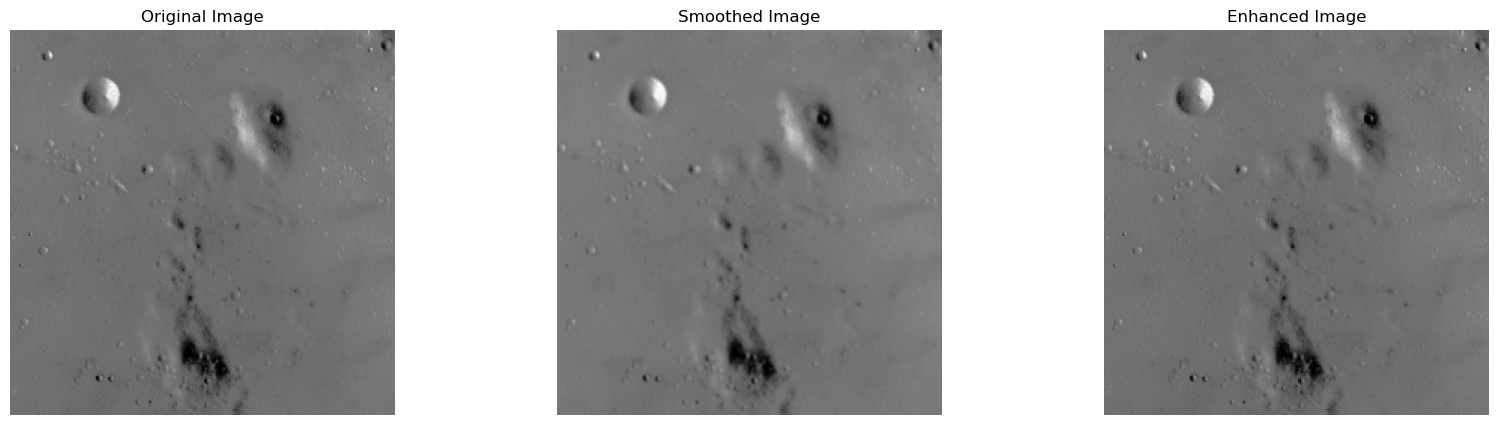

In [17]:
# solution
moon_image = data.moon()
smooth_image = filters.gaussian(moon_image, sigma=1)
details = moon_image - smooth_image
enhanced_image = moon_image + details

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].imshow(moon_image, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(smooth_image, cmap='gray')
axes[1].set_title('Smoothed Image')

axes[2].imshow(enhanced_image, cmap='gray')
axes[2].set_title('Enhanced Image')

for ax in axes:
    ax.axis('off')

plt.show()



*   Keeping amount=1, change the value of sigma=5,10 and repeat the enhancements
*   Using the best sigma value, vary the amount value=0.5,2,5,10
*   Visualize the sharpened images using matplotlib

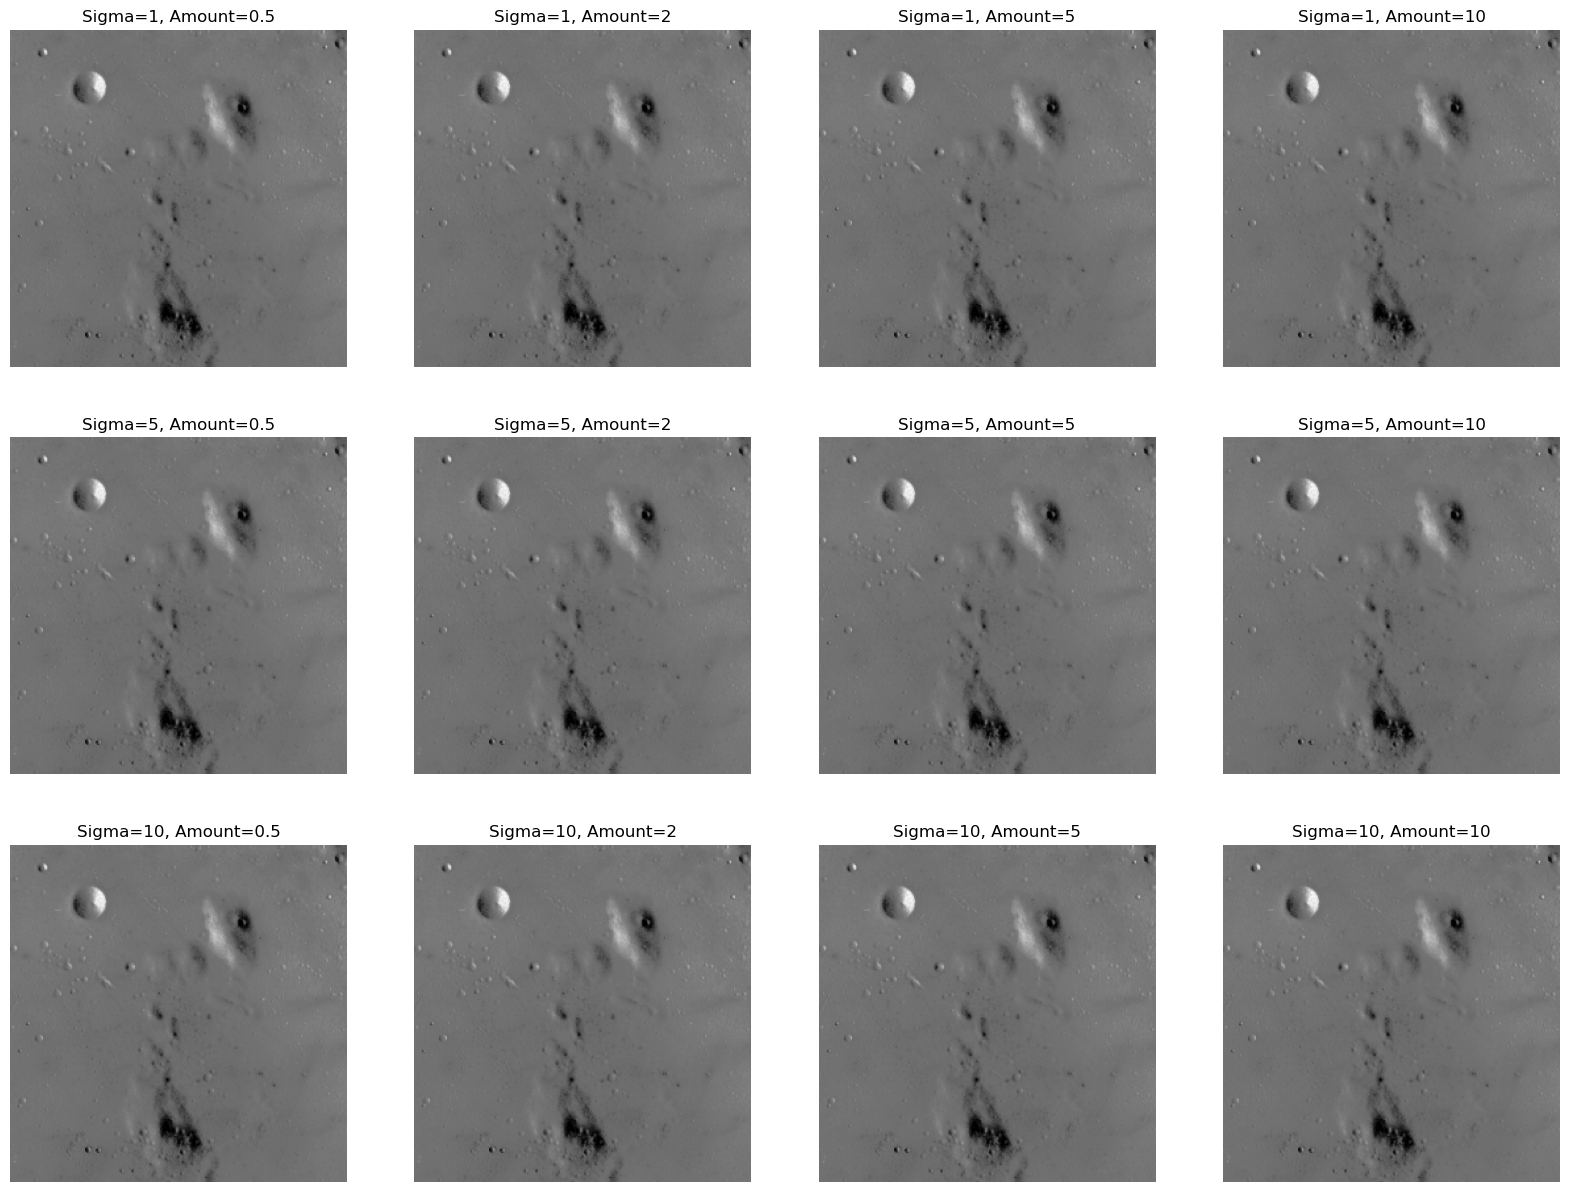

In [19]:
# solution
sigmas = [1, 5, 10]
amounts = [0.5, 2, 5, 10]

fig, axes = plt.subplots(len(sigmas), len(amounts), figsize=(20, 15))

for i, sigma in enumerate(sigmas):
    smooth_image = filters.gaussian(moon_image, sigma=sigma)
    for j, amount in enumerate(amounts):
        enhanced_image = moon_image + amount * (moon_image - smooth_image)
        axes[i, j].imshow(enhanced_image, cmap='gray')
        axes[i, j].set_title(f'Sigma={sigma}, Amount={amount}')
        axes[i, j].axis('off')

plt.show()


# Edge Detection

### Exercise:
*   Read 'camera' image from the data module
*   Perform sobel, prewitt and roberts edge detection on the image
*   Visualize the original image, the edges and the edges superimposed on the original image

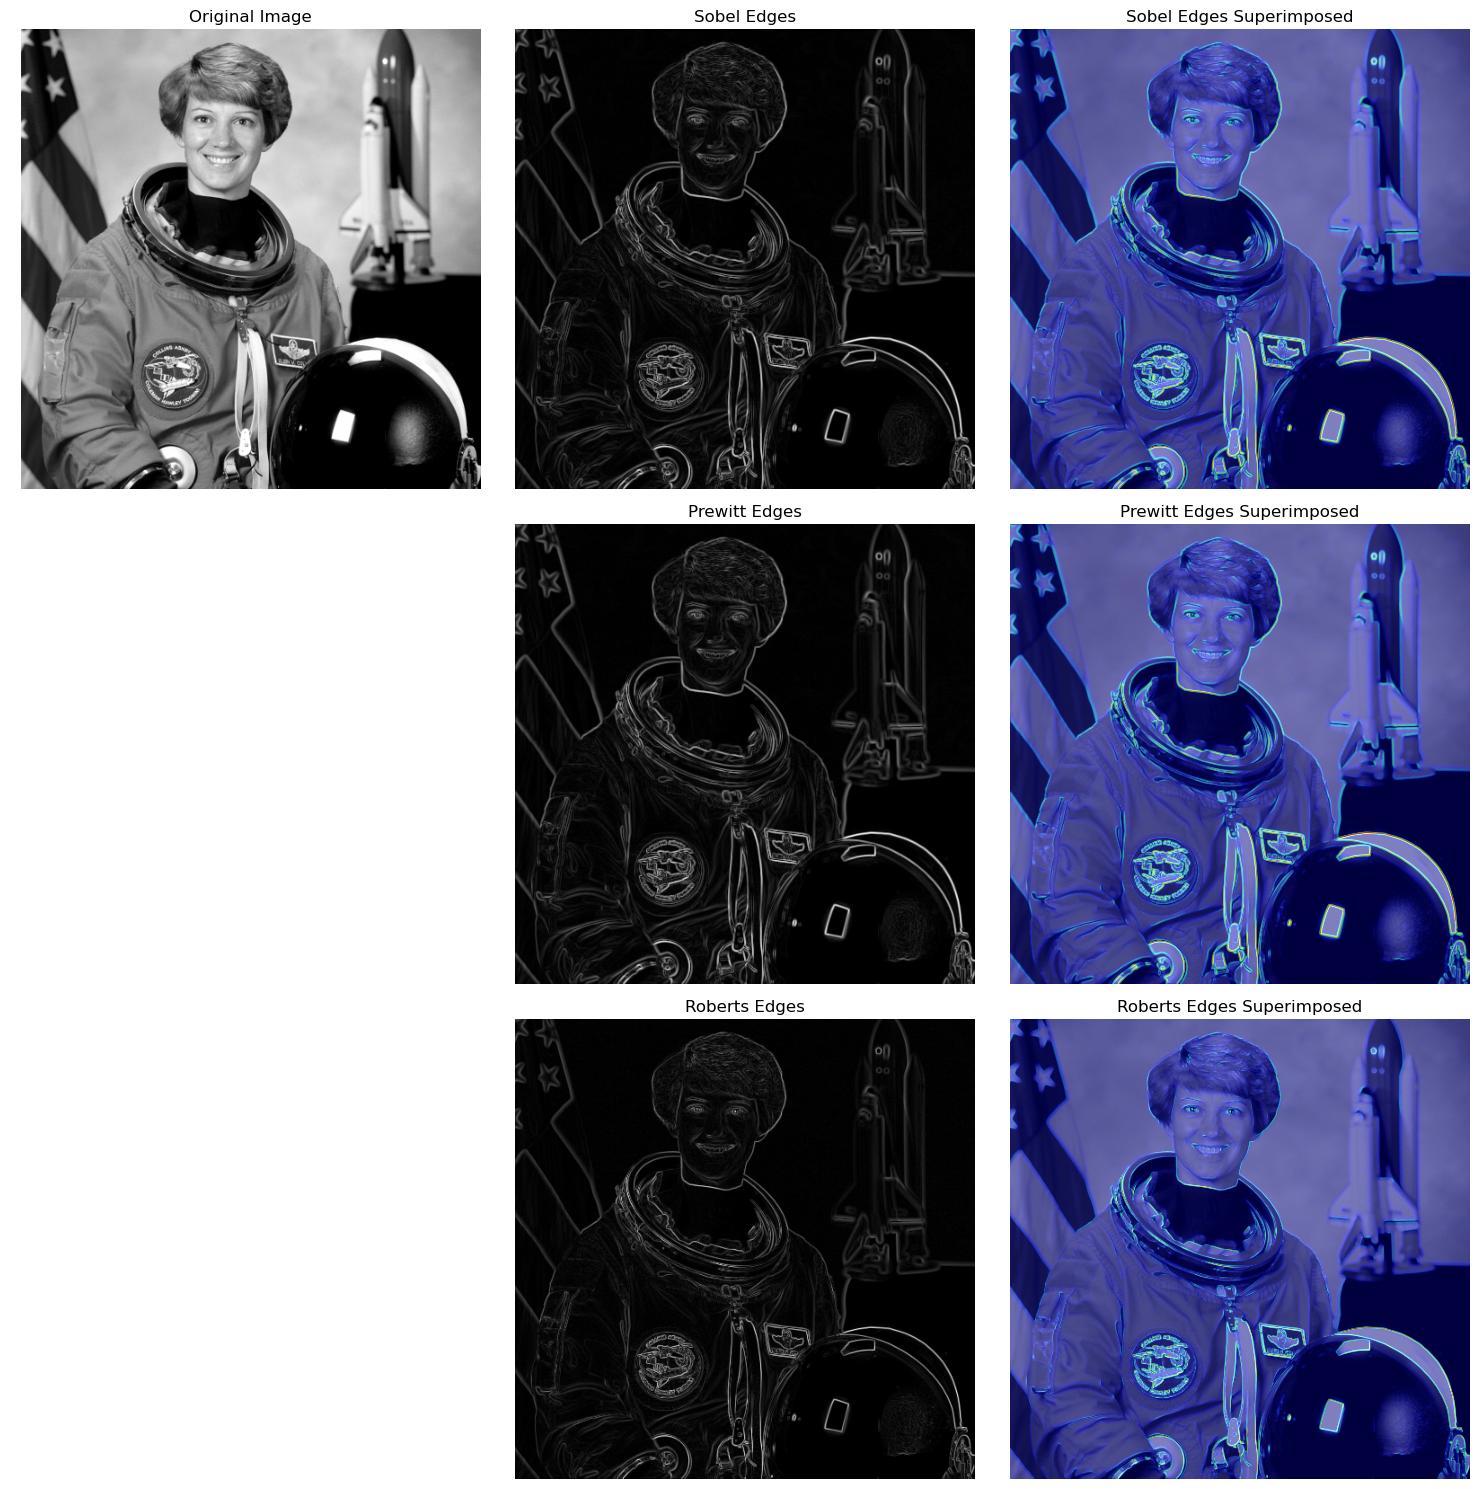

In [21]:
# solution
sobel_edges = filters.sobel(image)
prewitt_edges = filters.prewitt(image)
roberts_edges = filters.roberts(image)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')

# Sobel edges
axes[0, 1].imshow(sobel_edges, cmap='gray')
axes[0, 1].set_title('Sobel Edges')
axes[0, 2].imshow(image, cmap='gray')
axes[0, 2].imshow(sobel_edges, cmap='jet', alpha=0.5)
axes[0, 2].set_title('Sobel Edges Superimposed')

# Prewitt edges
axes[1, 1].imshow(prewitt_edges, cmap='gray')
axes[1, 1].set_title('Prewitt Edges')
axes[1, 2].imshow(image, cmap='gray')
axes[1, 2].imshow(prewitt_edges, cmap='jet', alpha=0.5)
axes[1, 2].set_title('Prewitt Edges Superimposed')

# Roberts edges
axes[2, 1].imshow(roberts_edges, cmap='gray')
axes[2, 1].set_title('Roberts Edges')
axes[2, 2].imshow(image, cmap='gray')
axes[2, 2].imshow(roberts_edges, cmap='jet', alpha=0.5)
axes[2, 2].set_title('Roberts Edges Superimposed')

for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()




*   What is the difference between each of the edge detectors?
*   What does you think is the limitation of each of the detector?



**Solution**

*(Double-click or enter to edit)*

...
Differences and Limitations


1,Sobel Edge Detector:

Description: Uses convolution with Sobel kernels to approximate the gradient of the image intensity.

Characteristics: Provides edge detection with smoothing due to the larger convolution kernel size.

Limitations: Sensitive to noise and might miss some fine details.

2,Prewitt Edge Detector:

Description: Similar to Sobel, but uses Prewitt kernels for convolution.
Characteristics: Simpler convolution operation compared to Sobel, less smoothing.
Limitations: Also sensitive to noise and might not be as robust as Sobel in edge detection.

3,Roberts Edge Detector:

Description: Uses Roberts cross operators to calculate the gradient.
Characteristics: Detects edges using diagonal differences, resulting in high sensitivity to noise.
Limitations: Highly sensitive to noise and might produce more noise artifacts compared to Sobel and Prewitt.

### Exercise: Canny edge detector
*   Read 'camera' image from the data module
*   Apply canny operator with default parameters
*   Apply canny by varying sigma=1, 3, 5, 10
*   Visualize the original image along with the edges detected using matplotlib.

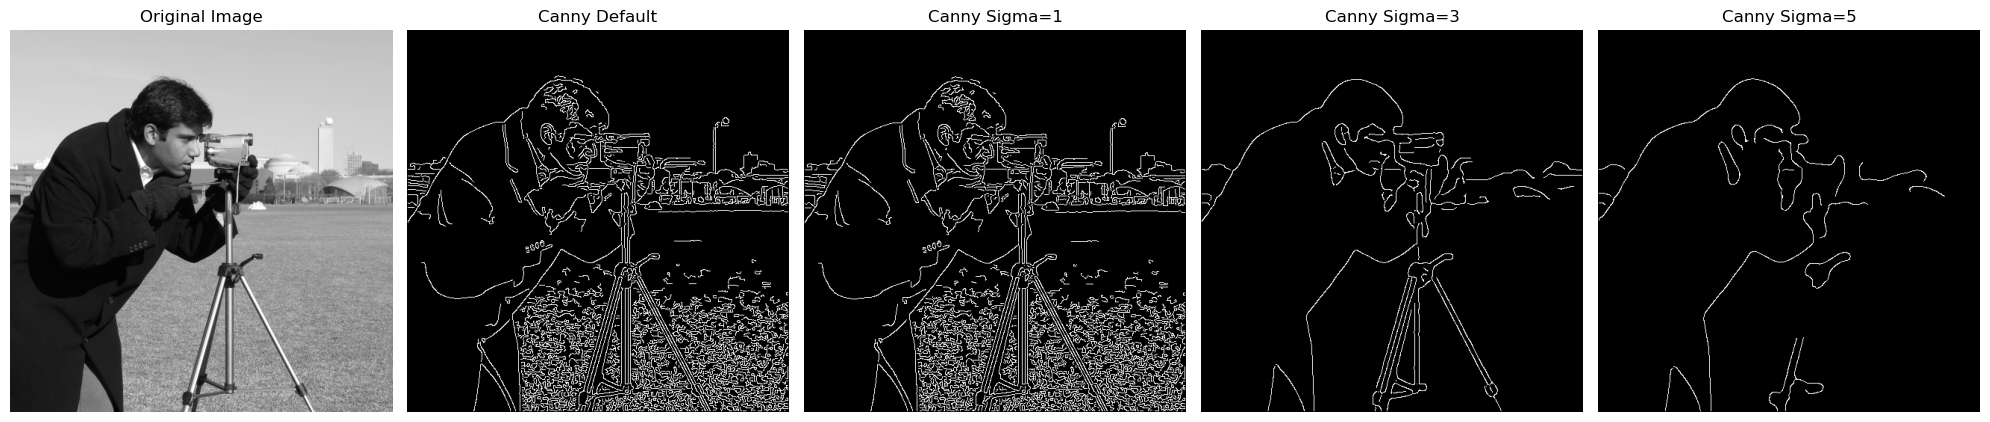

In [22]:
# solution
from skimage.feature import canny

image = data.camera()
canny_edges_default = canny(image)
canny_edges_sigma1 = canny(image, sigma=1)
canny_edges_sigma3 = canny(image, sigma=3)
canny_edges_sigma5 = canny(image, sigma=5)
canny_edges_sigma10 = canny(image, sigma=10)
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(canny_edges_default, cmap='gray')
axes[1].set_title('Canny Default')

axes[2].imshow(canny_edges_sigma1, cmap='gray')
axes[2].set_title('Canny Sigma=1')

axes[3].imshow(canny_edges_sigma3, cmap='gray')
axes[3].set_title('Canny Sigma=3')

axes[4].imshow(canny_edges_sigma5, cmap='gray')
axes[4].set_title('Canny Sigma=5')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()



*   What is the effect of varying the sigma values on the edges?
*   What do the high threshold and low threshold parameters denote?


**Solution**

*(Double-click or enter to edit)*

...
Effects of Varying Sigma and Thresholds

Sigma:

Higher sigma values result in more smoothing, which reduces noise but may also blur edges.
Lower sigma values result in less smoothing, preserving more detail but making the detector more sensitive to noise.
Thresholds:

High Threshold: The upper boundary for hysteresis thresholding. Pixels with gradient magnitude above this value are considered strong edges.
Low Threshold: The lower boundary for hysteresis thresholding. Pixels with gradient magnitude between the low and high thresholds are considered weak edges and are included only if they are connected to strong edges.

*   What is the algorithm behind the Canny operator?


**Solution**

*(Double-click or enter to edit)*

...

Noise Reduction: Smooth the image using a Gaussian filter to reduce noise.

Gradient Calculation: Calculate the intensity gradients of the image using finite difference approximations.

Non-Maximum Suppression: Thin the edges by suppressing pixels that are not at the maximum in the gradient direction.

Double Thresholding: Identify strong and weak edges using high and low threshold values.

Edge Tracking by Hysteresis: Finalize the edge detection by suppressing all weak edges that are not connected to strong edges.